## Remote Sensing Time Series with Xarray

![xarray](http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png)


To cite from their homepage:

>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw [NumPy](http://www.numpy.org/)-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
>
>Xarray was inspired by and borrows heavily from [pandas](http://pandas.pydata.org/), the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with [netCDF](http://www.unidata.ucar.edu/software/netcdf) files, which were the source of xarray’s data model, and integrates tightly with [dask](http://dask.org/) for parallel computing.

This is great since we know that all things numpy are fast, pandas at the center of Python Data Science anyways since it's so friendly, powerful and flexible. Furthermore, netCDF is a really good data format to use since it encapsulates not only potentially multiple variables, but also meta-data and units and is very widely used in sciences and in the industry. And finally, dask is really great if you have to work with large and potentially distributed data. We will have a quick look at dask later in the course. For now it's good to know that xarray will automatically utilize it if it's installed.

## Basics

Xarray has two core data structures, which build upon and extend the core strengths of NumPy and pandas. Both are fundamentally N-dimensional:

- **DataArray** is a labeled, N-dimensional array. It is an N-D generalization of a pandas.Series.
- **Dataset** is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame.

The value of attaching labels to numpy’s numpy.ndarray may be fairly obvious, but the dataset may need more motivation. The dataset data model is borrowed from the netCDF file format, which also provides xarray with a natural and portable serialization format. NetCDF is very popular in the geosciences, and there are existing libraries for reading and writing netCDF in many programming languages, including Python.

In [2]:
import glob
import pandas as pd
import xarray as xr

In [5]:
data = xr.tutorial.open_dataset('Data/raster/timeseries/demmin_20170501.tif')

# pass the data to Dashboard
#dash = Dashboard(data)
#dash.panel.servable()


HTTPError: HTTP Error 404: Not Found

In [3]:
paths = glob.glob("Data/raster/timeseries/*")
paths

['Data/raster/timeseries/demmin_20170501.tif',
 'Data/raster/timeseries/demmin_20170929.tif',
 'Data/raster/timeseries/demmin_20170501.tif.aux.xml',
 'Data/raster/timeseries/demmin_20170602.tif',
 'Data/raster/timeseries/demmin_20170609.tif',
 'Data/raster/timeseries/demmin_20171008.tif',
 'Data/raster/timeseries/demmin_20170711.tif.aux.xml',
 'Data/raster/timeseries/demmin_20170720.tif.aux.xml',
 'Data/raster/timeseries/demmin_20170929.tif.aux.xml',
 'Data/raster/timeseries/demmin_20170609.tif.aux.xml',
 'Data/raster/timeseries/demmin_20170711.tif',
 'Data/raster/timeseries/demmin_20170406.tif',
 'Data/raster/timeseries/demmin_20170720.tif',
 'Data/raster/timeseries/demmin_20170602.tif.aux.xml',
 'Data/raster/timeseries/demmin_20170828.tif',
 'Data/raster/timeseries/demmin_20170406.tif.aux.xml']

In [3]:
df = pd.DataFrame(dict(scenes=paths))
df['datestring'] = df.scenes.apply(lambda x: x.split('_')[1])
df['datestring'] = df.datestring.apply(lambda x: x.split('.')[0])
df['datetime'] = pd.to_datetime(df.datestring, format='%Y%m%d')
df = df.sort_values('datetime').reset_index(drop=True)
df.head()

scenes datestring   datetime
0  Data/raster/timeseries/demmin_20170406.tif   20170406 2017-04-06
1  Data/raster/timeseries/demmin_20170501.tif   20170501 2017-05-01
2  Data/raster/timeseries/demmin_20170602.tif   20170602 2017-06-02
3  Data/raster/timeseries/demmin_20170609.tif   20170609 2017-06-09
4  Data/raster/timeseries/demmin_20170711.tif   20170711 2017-07-11

In [4]:
datasets = []
for i, row in df.iterrows():
    da = xr.open_rasterio(row.scenes)
    ds = da.to_dataset(dim="band").rename({1:'blue', 2:'green',3:'red',4:'nir',5:'swir1',6:'swir2',7:'pixel_qa'})
    datasets.append(ds)

In [5]:
DS = xr.concat(datasets, dim=pd.DatetimeIndex(df.datetime.values, name='time'))

In [6]:
DS

<xarray.Dataset>
Dimensions:   (time: 9, x: 511, y: 612)
Coordinates:
  * x         (x) float64 12.97 12.97 12.97 12.97 ... 13.11 13.11 13.11 13.11
  * y         (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81
  * time      (time) datetime64[ns] 2017-04-06 2017-05-01 ... 2017-10-08
Data variables:
    blue      (time, y, x) float32 806.0 922.0 1002.0 ... 1435.0 1286.0 939.0
    green     (time, y, x) float32 764.0 812.0 871.0 ... 1323.0 1249.0 884.0
    red       (time, y, x) float32 461.0 493.0 553.0 ... 1070.0 952.0 734.0
    nir       (time, y, x) float32 2560.0 2333.0 2213.0 ... 2770.0 2427.0 1949.0
    swir1     (time, y, x) float32 2529.0 2549.0 2656.0 ... 2590.0 2457.0 1888.0
    swir2     (time, y, x) float32 1801.0 1991.0 2268.0 ... 2057.0 1973.0 1466.0
    pixel_qa  (time, y, x) float32 322.0 322.0 322.0 322.0 ... 392.0 392.0 392.0
Attributes:
    transform:      (0.0002689671996086077, 0.0, 12.973873575, 0.0, -0.000269...
    crs:            +init=epsg:4326
    res:            (0.0002689671996086077, 0.00026905423529412426)
    is_tiled:       0
    nodatavals:     (-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area

## Subsetting the Xarray

Using the Xarray approach makes it very easy to subset the data.
For example, we can easily create spatial and temporal slices

In [7]:
DS.time
DS.x
DS.y

<xarray.DataArray 'y' (y: 612)>
array([53.976532, 53.976263, 53.975994, ..., 53.812678, 53.812409, 53.81214 ])
Coordinates:
  * y        (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81

Of course we can also select different bands

In [8]:
DS.nir

<xarray.DataArray 'nir' (time: 9, y: 612, x: 511)>
array([[[2560., 2333., 2213., ..., 4293., 4293., 4485.],
        [2117., 2065., 2019., ..., 3444., 3444., 3237.],
        [2303., 2241., 2174., ..., 2753., 2753., 2186.],
        ...,
        [4564., 4474., 4474., ..., 4743., 4127., 4518.],
        [4328., 4422., 4422., ..., 4015., 3372., 4140.],
        [4422., 4421., 4421., ..., 3073., 2534., 2966.]],

       [[2950., 2819., 2497., ..., 2569., 2569., 2737.],
        [2420., 2345., 2397., ..., 2367., 2367., 2520.],
        [2447., 2418., 2371., ..., 2816., 2816., 2519.],
        ...,
        [5721., 5686., 5686., ..., 5957., 6203., 6363.],
        [5561., 5527., 5527., ..., 5767., 5980., 6354.],
        [5584., 5615., 5615., ..., 5592., 5955., 6288.]],

       [[4135., 3816., 3279., ..., 2401., 2401., 2635.],
        [3180., 3119., 3176., ..., 2524., 2524., 2607.],
        [3165., 3193., 3125., ..., 3000., 3000., 2539.],
        ...,
        [5214., 5181., 5181., ..., 5357., 5229., 5290.],
        [5128., 5149., 5149., ..., 5284., 5152., 5272.],
        [5114., 5153., 5153., ..., 5267., 5225., 5276.]],

       ...,

       [[ 979.,  908.,  869., ..., 1573., 1573., 1485.],
        [ 791.,  784.,  779., ..., 1509., 1509., 1334.],
        [ 756.,  761.,  774., ..., 1292., 1292., 1157.],
        ...,
        [3239., 3194., 3194., ...,  783.,  730.,  702.],
        [3183., 3166., 3166., ...,  809.,  748.,  706.],
        [3148., 3071., 3071., ...,  862.,  795.,  736.]],

       [[3022., 2666., 2436., ..., 1840., 1840., 2053.],
        [2195., 2143., 2103., ..., 1864., 1864., 2209.],
        [2163., 2171., 2141., ..., 2144., 2144., 2461.],
        ...,
        [2884., 2934., 2934., ..., 3629., 3694., 3628.],
        [3033., 3136., 3136., ..., 3631., 3646., 3552.],
        [3219., 3226., 3226., ..., 3549., 3594., 3562.]],

       [[4478., 4036., 3278., ..., 5683., 5683., 6284.],
        [3399., 2864., 2560., ..., 5119., 5119., 5323.],
        [3247., 2897., 2600., ..., 4776., 4776., 4626.],
        ...,
        [1809., 1745., 1745., ..., 2742., 2710., 2556.],
        [2099., 2149., 2149., ..., 2881., 2633., 2354.],
        [2042., 2112., 2112., ..., 2770., 2427., 1949.]]], dtype=float32)
Coordinates:
  * x        (x) float64 12.97 12.97 12.97 12.97 ... 13.11 13.11 13.11 13.11
  * y        (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81
  * time     (time) datetime64[ns] 2017-04-06 2017-05-01 ... 2017-10-08

And we can combine these statements and select for example different bands for different time slices

In [9]:
DS['red'].isel(time = 1)

<xarray.DataArray 'red' (y: 612, x: 511)>
array([[563., 649., 757., ..., 406., 406., 498.],
       [823., 836., 852., ..., 486., 486., 578.],
       [895., 878., 856., ..., 625., 625., 624.],
       ...,
       [205., 193., 193., ..., 334., 352., 376.],
       [201., 183., 183., ..., 337., 344., 352.],
       [192., 194., 194., ..., 329., 337., 356.]], dtype=float32)
Coordinates:
  * x        (x) float64 12.97 12.97 12.97 12.97 ... 13.11 13.11 13.11 13.11
  * y        (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81
    time     datetime64[ns] 2017-05-01

In [10]:
DS.red.dims


('time', 'y', 'x')

In [11]:
DS.red.coords

Coordinates:
  * x        (x) float64 12.97 12.97 12.97 12.97 ... 13.11 13.11 13.11 13.11
  * y        (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81
  * time     (time) datetime64[ns] 2017-04-06 2017-05-01 ... 2017-10-08

In [12]:
DS.red.attrs

{}

In [13]:
DS.red.values

array([[[ 461.,  493.,  553., ...,  878.,  878., 1204.],
        [ 645.,  657.,  643., ...,  717.,  717.,  612.],
        [ 733.,  736.,  700., ...,  636.,  636.,  387.],
        ...,
        [ 227.,  226.,  226., ...,  219.,  175.,  188.],
        [ 246.,  223.,  223., ...,  186.,  154.,  196.],
        [ 239.,  218.,  218., ...,  144.,  112.,  126.]],

       [[ 563.,  649.,  757., ...,  406.,  406.,  498.],
        [ 823.,  836.,  852., ...,  486.,  486.,  578.],
        [ 895.,  878.,  856., ...,  625.,  625.,  624.],
        ...,
        [ 205.,  193.,  193., ...,  334.,  352.,  376.],
        [ 201.,  183.,  183., ...,  337.,  344.,  352.],
        [ 192.,  194.,  194., ...,  329.,  337.,  356.]],

       [[ 604.,  758.,  901., ...,  752.,  752.,  814.],
        [1020., 1035., 1055., ...,  785.,  785.,  703.],
        [1042., 1049., 1038., ...,  666.,  666.,  532.],
        ...,
        [ 157.,  158.,  158., ...,  167.,  168.,  168.],
        [ 159.,  156.,  156., ...,  181.,  18

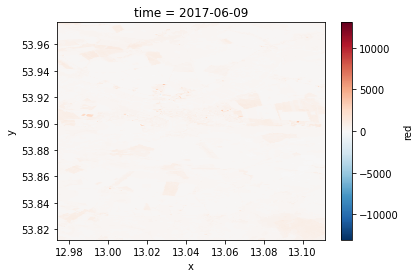

In [14]:
DS.red.isel(time=3).plot()

In [15]:
# Indexing with dimension names
DS.red.sel(time='2017')

<xarray.DataArray 'red' (time: 9, y: 612, x: 511)>
array([[[ 461.,  493.,  553., ...,  878.,  878., 1204.],
        [ 645.,  657.,  643., ...,  717.,  717.,  612.],
        [ 733.,  736.,  700., ...,  636.,  636.,  387.],
        ...,
        [ 227.,  226.,  226., ...,  219.,  175.,  188.],
        [ 246.,  223.,  223., ...,  186.,  154.,  196.],
        [ 239.,  218.,  218., ...,  144.,  112.,  126.]],

       [[ 563.,  649.,  757., ...,  406.,  406.,  498.],
        [ 823.,  836.,  852., ...,  486.,  486.,  578.],
        [ 895.,  878.,  856., ...,  625.,  625.,  624.],
        ...,
        [ 205.,  193.,  193., ...,  334.,  352.,  376.],
        [ 201.,  183.,  183., ...,  337.,  344.,  352.],
        [ 192.,  194.,  194., ...,  329.,  337.,  356.]],

       [[ 604.,  758.,  901., ...,  752.,  752.,  814.],
        [1020., 1035., 1055., ...,  785.,  785.,  703.],
        [1042., 1049., 1038., ...,  666.,  666.,  532.],
        ...,
        [ 157.,  158.,  158., ...,  167.,  168.,  168.],
        [ 159.,  156.,  156., ...,  181.,  182.,  176.],
        [ 159.,  160.,  160., ...,  175.,  182.,  177.]],

       ...,

       [[ 157.,  150.,  154., ...,  282.,  282.,  299.],
        [ 137.,  139.,  144., ...,  284.,  284.,  325.],
        [ 144.,  138.,  145., ...,  336.,  336.,  357.],
        ...,
        [ 971.,  970.,  970., ...,  383.,  371.,  361.],
        [ 957.,  966.,  966., ...,  406.,  393.,  377.],
        [ 964.,  971.,  971., ...,  428.,  414.,  387.]],

       [[ 638.,  656.,  669., ...,  798.,  798.,  774.],
        [ 705.,  717.,  728., ...,  765.,  765.,  780.],
        [ 743.,  744.,  735., ...,  757.,  757.,  783.],
        ...,
        [1724., 1856., 1856., ..., 1606., 1715., 1643.],
        [1925., 2027., 2027., ..., 1596., 1635., 1555.],
        [2124., 2088., 2088., ..., 1571., 1619., 1605.]],

       [[2385., 1874., 1257., ..., 3639., 3639., 4220.],
        [1437., 1135.,  848., ..., 3064., 3064., 3442.],
        [1256., 1052.,  866., ..., 2756., 2756., 2645.],
        ...,
        [ 619.,  657.,  657., ...,  886.,  912.,  900.],
        [ 644.,  683.,  683., ..., 1044., 1053.,  903.],
        [ 634.,  670.,  670., ..., 1070.,  952.,  734.]]], dtype=float32)
Coordinates:
  * x        (x) float64 12.97 12.97 12.97 12.97 ... 13.11 13.11 13.11 13.11
  * y        (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81
  * time     (time) datetime64[ns] 2017-04-06 2017-05-01 ... 2017-10-08

In [16]:
DS.red.sel(time='2017-07')

<xarray.DataArray 'red' (time: 2, y: 612, x: 511)>
array([[[ 299.,  310.,  318., ..., 1539., 1539., 1598.],
        [ 300.,  323.,  298., ..., 1415., 1415., 1095.],
        [ 304.,  312.,  311., ..., 1079., 1079.,  924.],
        ...,
        [ 427.,  358.,  358., ...,  548.,  524.,  492.],
        [ 738.,  536.,  536., ...,  553.,  539.,  490.],
        [ 943.,  667.,  667., ...,  492.,  467.,  429.]],

       [[ 332.,  327.,  309., ...,  631.,  631.,  525.],
        [ 290.,  295.,  286., ...,  660.,  660., 1489.],
        [ 249.,  255.,  265., ..., 1727., 1727., 1645.],
        ...,
        [ 330.,  268.,  268., ..., 1854., 1730., 1568.],
        [ 283.,  264.,  264., ..., 1920., 1551., 1605.],
        [ 282.,  294.,  294., ..., 1183., 1747., 1539.]]], dtype=float32)
Coordinates:
  * x        (x) float64 12.97 12.97 12.97 12.97 ... 13.11 13.11 13.11 13.11
  * y        (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81
  * time     (time) datetime64[ns] 2017-07-11 2017-07-20

In [17]:
DS.red.sel(time='2017-07-11')

<xarray.DataArray 'red' (y: 612, x: 511)>
array([[ 299.,  310.,  318., ..., 1539., 1539., 1598.],
       [ 300.,  323.,  298., ..., 1415., 1415., 1095.],
       [ 304.,  312.,  311., ..., 1079., 1079.,  924.],
       ...,
       [ 427.,  358.,  358., ...,  548.,  524.,  492.],
       [ 738.,  536.,  536., ...,  553.,  539.,  490.],
       [ 943.,  667.,  667., ...,  492.,  467.,  429.]], dtype=float32)
Coordinates:
  * x        (x) float64 12.97 12.97 12.97 12.97 ... 13.11 13.11 13.11 13.11
  * y        (y) float64 53.98 53.98 53.98 53.98 ... 53.81 53.81 53.81 53.81
    time     datetime64[ns] 2017-07-11

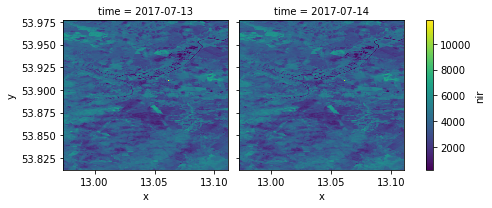

In [19]:
import matplotlib.pyplot as plt
# New dates to interpolate data for
new_dates = ['2017-07-13','2017-07-14']

# Interpolate Landsat values for three new dates
ds_interp = DS.interp(time=new_dates)

# Plot the new interpolated data
ds_interp.nir.plot(col='time')
plt.show()

In [20]:
def rgb(ds, bands=['red', 'green', 'blue'], index=None, index_dim='time', 
        percentile_stretch = None,robust=True, col_wrap=4, size=6, **kwargs):

    index = index if isinstance(index, list) else [index]
        
    # Select bands and observations and convert to DataArray
    da = ds[bands].isel(**{index_dim: index}).to_array()
        
        
    if percentile_stretch:
        vmin, vmax = da.quantile(percentile_stretch).values
        kwargs.update({'vmin': vmin, 'vmax': vmax})
            
    da.squeeze(dim=index_dim).plot.imshow(robust=robust, size=size, **kwargs)        

The good thing is that there are a lot of functions already creating which work on a xarray data

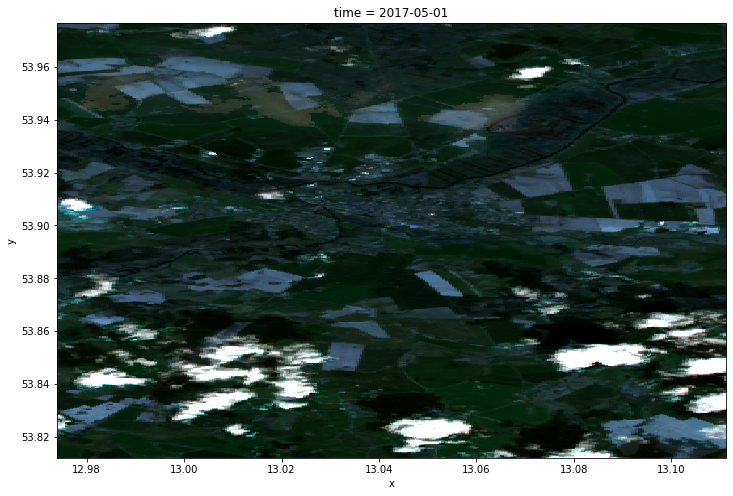

In [21]:
import geopandas

acquisition_number = 1

rgb(DS, bands=['red', 'green', 'blue'], index=acquisition_number , index_dim='time',  percentile_stretch = (0.02, 0.98),  size =8)

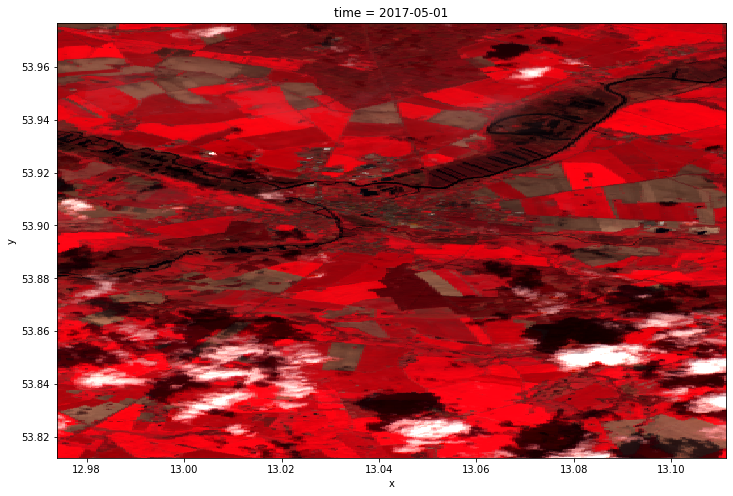

In [22]:
rgb(DS, bands=['nir', 'blue', 'green'], index=acquisition_number , index_dim='time', robust=True, percentile_stretch = (0.02, 0.98),size=8)

## Processing 

In [23]:
cluster_bands = ['red', 'green', 'blue', 'swir1']

In [24]:
import numpy as np
from sklearn.cluster import KMeans
from collections import OrderedDict

In [25]:
bands = ['red', 'green', 'blue']

array_from = []
for band in bands:
    array_from.append(DS[band].values.flatten())
        
features = np.array(array_from)
features = np.swapaxes(features, 0, 1)
features

array([[ 461.,  764.,  806.],
       [ 493.,  812.,  922.],
       [ 553.,  871., 1002.],
       ...,
       [1070., 1323., 1435.],
       [ 952., 1249., 1286.],
       [ 734.,  884.,  939.]], dtype=float32)

In [26]:
classified = KMeans(n_clusters=4, n_jobs=-1).fit(features)

In [27]:
classified_data = OrderedDict()
shape = DS[bands[0]].values.shape
classification = classified.labels_.reshape(shape)
coord_names = ['time', 'y', 'x']
classified_data['classification'] = (coord_names, classification)
dataset_out = xarray.Dataset(classified_data,
                             DS.coords)

NameError: name 'xarray' is not defined

In [ ]:
DS['classification']=dataset_out.classification

In [ ]:
DS

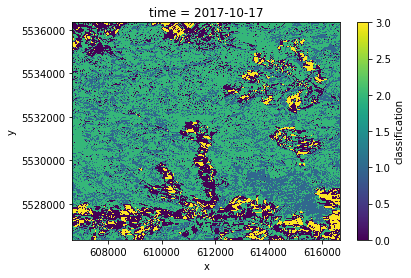

In [92]:
DS.classification.isel(time = acquisition_number).plot(cmap = "viridis")

## NOAA's NCEP Example

The following example is from: https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html

One thing we love about xarray is the `open_mfdataset()` function, which combines many netCDF files into a single xarray Dataset.
But what if the files are stored on a remote server and accessed over OpenDAP. An example can be found in NOAA's NCEP Reanalysis catalog.

https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis/surface/catalog.html

The dataset is split into different files for each variable and year. For example, a single file for surface air temperature looks like:

http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1948.nc

In [47]:
# dataset split into different files
base_url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995'
files = [f'{base_url}.{year}.nc' for year in range(1948, 2019)]
files

['http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1948.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1949.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1950.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1951.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1952.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1953.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1954.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1955.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1956.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1957.nc',
 'http://w

However, we can open them as if they were a single file!

In [50]:
import dask
ds = xr.open_mfdataset(files[-10:])
ds

<ipython-input-50-61fced8210f1>:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  ds = xr.open_mfdataset(files[-10:])
/home/sth02bh/.local/lib/python3.8/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  combined = auto_combine(


<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 14608)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 2009-01-01 ... 2018-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<concatenate, shape=(14608, 7...
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2009)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 2009/01 by Hoop (netCDF2.3)\nCon...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

In [58]:
dseu = ds.sel(lat=slice(60,20), lon=slice(0,30))

ts = dseu.mean(dim=['lat','lon'])
ts

<xarray.Dataset>
Dimensions:  (time: 14608)
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01 ... 2018-12-31T18:00:00
Data variables:
    air      (time) float32 dask.array<mean_agg-aggregate, shape=(14608,), dt...

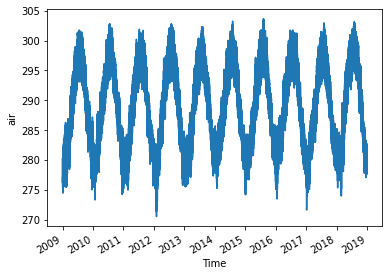

In [60]:
ts.air.plot()

## Some actual Analysis: SST example

In [63]:
# we want to use interactive plotting with hvplot
import holoviews as hv
from holoviews.streams import Params
import hvplot.xarray

In [64]:
%system wget http://ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc

['--2020-06-25 14:51:18--  http://ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc',
 'Resolving ldeo.columbia.edu (ldeo.columbia.edu)... 129.236.19.40',
 'Connecting to ldeo.columbia.edu (ldeo.columbia.edu)|129.236.19.40|:80... connected.',
 'HTTP request sent, awaiting response... 302 Found',
 'Location: https://www.ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc [following]',
 '--2020-06-25 14:51:19--  https://www.ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc',
 'Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15',
 'Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 43852246 (42M) [application/x-netcdf]',
 'Saving to: ‘NOAA_NCDC_ERSST_v3b_SST.nc’',
 '',
 '     0K .......... .......... .......... .......... ..........  0%  520K 82s',
 '    50K .......... .......... .......... .......... ..........  0%  521K 82s',
 '   100K .......... .......... ......

In [66]:
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

As you can see the longitudes are organized from 0 - 360 (US style). We can change this easily:

In [67]:
# convert to -180/180
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)

sst = ds.sst
sst

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ]],

       ...,

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7991269, -1.8      , -1.8      , ..., -1.795673 ,
         -1.7962196, -1.7977009],
        [-1.7927674, -1.7925038, -1.7915517, ..., -1.7944354,
         -1.793256 , -1.792931 ],
        [-1.7937472, -1.7926315, -1.7916278, ..., -1.7945778,
         -1.7938863, -1.7943892]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.7951365, -1.7947417, -1.793957 , ..., -1.7964418,
         -1.7964072, -1.7955278],
        [-1.786857 , -1.7847214, -1.7827827, ..., -1.789054 ,
         -1.7878293, -1.7889112]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.7953163, -1.7965591, -1.7982306, ..., -1.7921674,
         -1.7924899, -1.7946447],
        [-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 -180.0 -178.0 -176.0 -174.0 ... 174.0 176.0 178.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               d

We can also operate over the dimensions. In the following cell we group by months, and compute the mean over the time dimensions creating a monthly climatology. The we compute the anomaly of each month in the original time-series to this climatology.

In [68]:
# group by time axis - take the mean of the grouped batches over the time dim
sst_clim = sst.groupby('time.month').mean(dim='time')
# substract the climatology from the months of every year
sst_anom = sst.groupby('time.month') - sst_clim

/home/sth02bh/.local/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


If we `groupby` in hvplot we get a slider where we can interact with the plot with.

In [69]:
sst_anom.hvplot('lon','lat',groupby='time', width=600, cmap='RdBu', clim=(-2,2))

:DynamicMap   [time]
   :Image   [lon,lat]   (sst)

We can also select a point in the dataset. You do not have to specify the exact matching grid cell - use `nearest` instead...

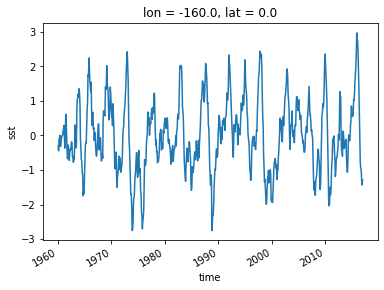

In [70]:
sst_ref = sst_anom.sel(lon=-160, lat=0, method='nearest')
sst_ref.plot();

In [71]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

/home/sth02bh/.local/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/sth02bh/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


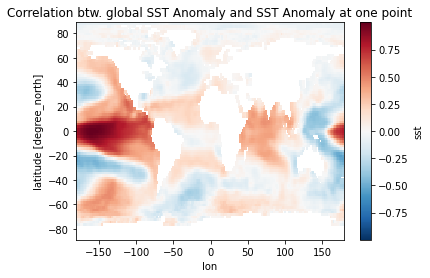

In [72]:
sst_cor = correlation(sst_anom, sst_ref, dims='time')
pc = sst_cor.plot()
pc.axes.set_title('Correlation btw. global SST Anomaly and SST Anomaly at one point');

## Exercise

- Import all scenes from Data/timesries into a xarray
- Import the landuse.shp from Data/vector
- Calculate the NDVI for each time step
- Extract the NDVI for each field
- Calculate the mean NDVI for each landuse type for each time step
- Create a time-series plot showing showing the mean NDVI for each landuse type